# COURSE: PCA and multivariate neural signal processing
## SECTION: Dimension reduction with PCA
### VIDEO: Python: State-space representation via PCA
#### Instructor: sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import copy
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
from pytopo import topoplotIndie

In [4]:
# mat file containing EEG, leadfield and channel locations
matfile = sio.loadmat('MATLAB_data_files/sampleEEGdata')
EEG = matfile['EEG'][0,0]
EEG['times'] = EEG['times'][0]

In [5]:
## compute PCA on ERP

erp = np.mean(EEG['data'],axis=2)
data = copy.deepcopy(erp)

# mean-center and covariance matrix
for ci in range(int(EEG['nbchan'])):
    data[ci,:] -= np.mean(data[ci,:])

covd = data@data.T / (int(EEG['pnts'])-1)

# eigendecomposition
evals,evecs = np.linalg.eig( covd )

# sort according to eigenvalues
soidx = np.argsort(evals)
soidx = soidx[::-1]
evals = evals[soidx]
evecs = evecs[:,soidx]

# convert eigenvalues to %change
evals = 100*evals / np.sum(evals)


# principal component time series
pc_timeseries = evecs[:,0:2].T @ erp


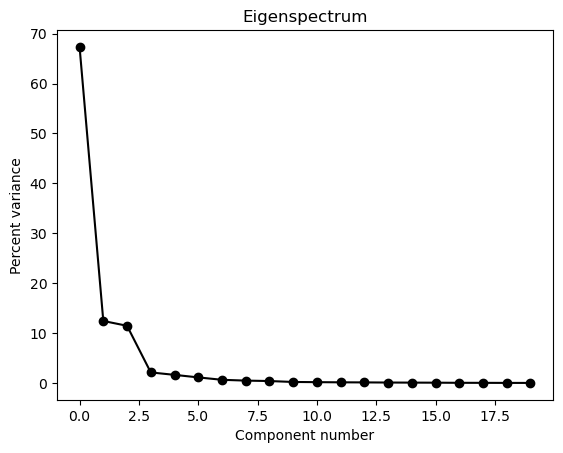

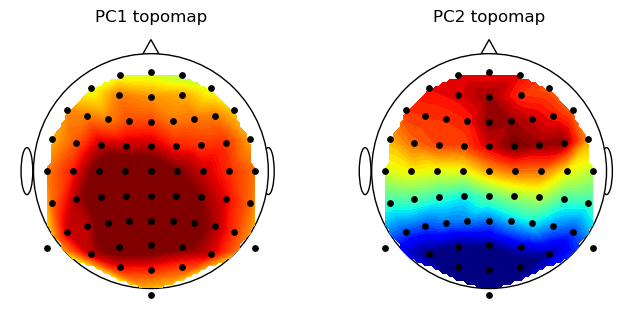

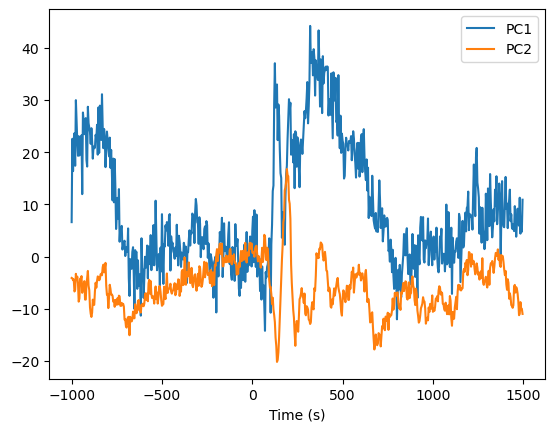

In [6]:
## plot PC results in time-voltage space

# eigenspectrum
plt.plot(evals[0:20],'ko-')
plt.title('Eigenspectrum')
plt.ylabel('Percent variance')
plt.xlabel('Component number')
plt.show()


# topographical maps of first two eigenvectors
_,axs = plt.subplots(1,2,figsize=(8,4))
topoplotIndie(evecs[:,0],EEG['chanlocs'],'PC1 topomap',axs[0])
topoplotIndie(evecs[:,1],EEG['chanlocs'],'PC2 topomap',axs[1])
plt.show()


# plot time series
plt.plot(EEG['times'],pc_timeseries.T)
plt.legend(('PC1','PC2'))
plt.xlabel('Time (s)')
plt.show()

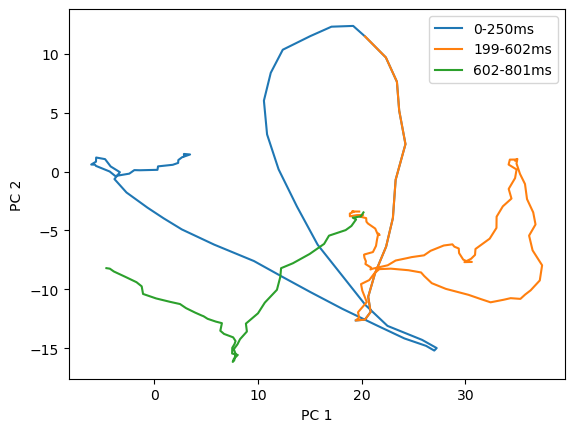

In [7]:
## plot state-space representation

# time windows for plotting in ms
timewin = [ [0,250], [200,600], [600,800] ]

# smooth the PC time series
pcts = copy.deepcopy(pc_timeseries)
k = 5 # smoothing kernel
for ti in range(k+1,EEG['pnts'][0][0]-k):
    pcts[0,ti] = np.mean(pc_timeseries[0,ti-k:ti+k])
    pcts[1,ti] = np.mean(pc_timeseries[1,ti-k:ti+k])



# now plot the data
for twini in range(3):
    
    # convert time to indices
    tidx1 = np.argmin(np.abs(EEG['times']-timewin[twini][0]))
    tidx2 = np.argmin(np.abs(EEG['times']-timewin[twini][1]))
    
    # and plot
    plt.plot(pcts[0,tidx1:tidx2],pcts[1,tidx1:tidx2],label='%g-%gms' %(np.round(EEG['times'][tidx1]),np.round(EEG['times'][tidx2])))

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()